In [1]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

from regression_module import *

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression

In [41]:
# Read in data
df = pd.read_csv('telco_clean.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 no

In [43]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'tenure_group_Tenure_0-12',
       'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48',
       'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60'],
      dtype='object')

In [44]:

Nominal Features:
Tenure
MonthlyCharges
TotalCharges

Categorical Features:
Gender
SeniorCitizen
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod

SyntaxError: invalid syntax (1681277742.py, line 1)

In [45]:
df=df[['gender', 'SeniorCitizen', 'Partner','tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'PaperlessBilling',
       'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic']]

In [46]:
# df=df[['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
#        'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
#        'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
#        'monthlycharges', 'totalcharges', 'churn', 'multiplelines_no',
#        'multiplelines_yes', 'internetservice_dsl',
#        'internetservice_fiber optic', 'contract_month-to-month',
#        'contract_one year', 'paymentmethod_bank transfer (automatic)',
#        'paymentmethod_credit card (automatic)',
#        'paymentmethod_electronic check', 'tenure_group_tenure_0-12',
#        'tenure_group_tenure_12-24', 'tenure_group_tenure_24-48',
#        'tenure_group_tenure_48-60', 'tenure_group_tenure_gt_60']]]

In [47]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [48]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'tenure', 'phoneservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'paperlessbilling', 'churn', 'internetservice_dsl',
       'internetservice_fiber optic'],
      dtype='object')

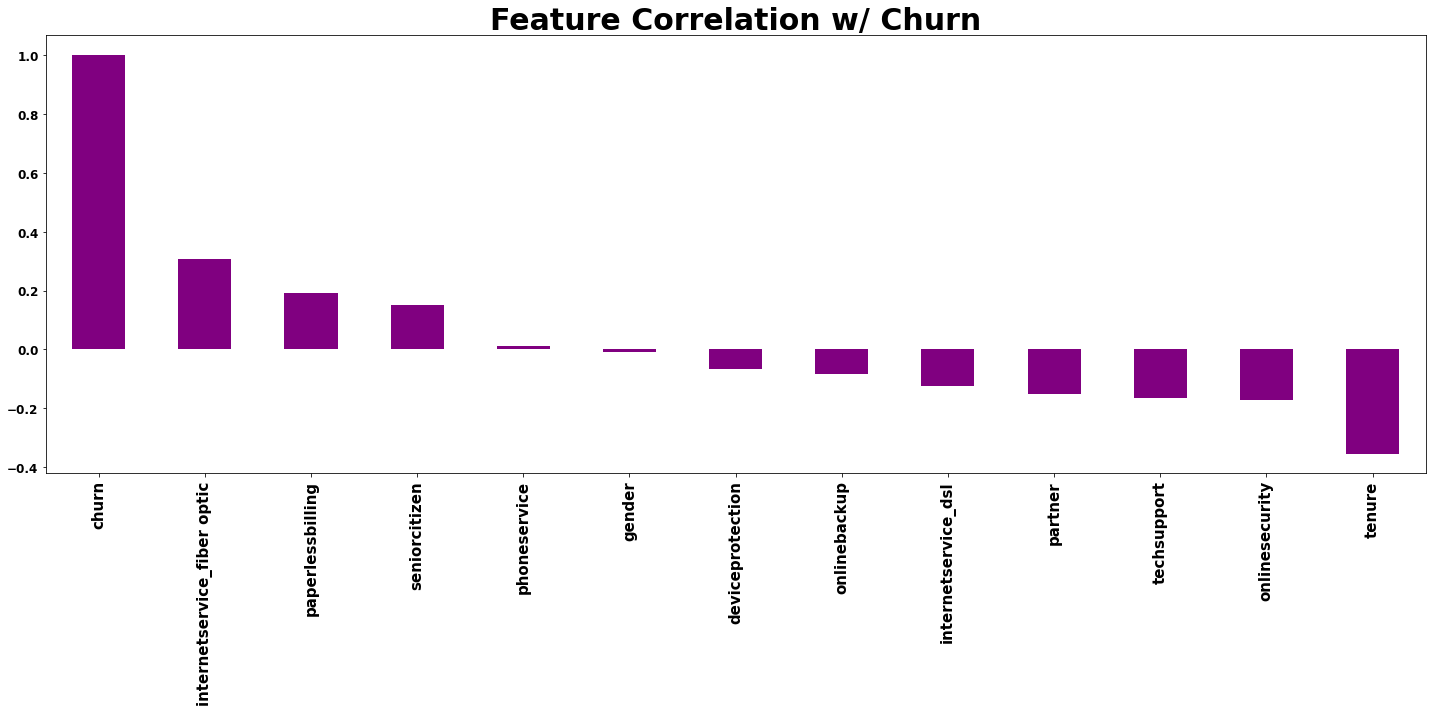

In [49]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Purple')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout()


 From our heatmap and correlation barplot, we see that monthly contract, and a lack of online security or techsupport have the strongest *positive* correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn. 

In [50]:
# X = df.loc[:, df.columns != 'churn']
# y = df.loc[:, df.columns == 'churn']

In [51]:
# Establish our target feature, churn, as our y feature
y = df.churn.values
# Drop our target feature from our features dataframe
X = df.drop('churn', axis = 1)
cols = X.columns

In [52]:
X.shape
# y.shape

(7032, 12)

In [53]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.433408
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7020
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                  0.2515
Time:                        16:57:48   Log-Likelihood:                -3047.7
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
gender                         -0.1220      0.062     -1.954      0.051   

In [54]:
# std = StandardScaler()
# scaled = std.fit_transform(df[num_cols])
# scaled = pd.DataFrame(scaled,columns=num_cols)

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

In [55]:
# from sklearn.decomposition import PCA
  
# pca = PCA(n_components = 0.85)
# # keep 85% of the variance in the original data
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
  
# explained_variance = pca.explained_variance_ratio_

# pca.n_components_ # to check how many components that avriance produced

#While you can use PCA on binary data (e.g. one-hot encoded data) that does not mean it is a good thing, 
# or it will work very well. PCA is designed for continuous variables. It tries to minimize variance (=squared deviations).
# The concept of squared deviations breaks down when you have binary variables.

In [56]:
# pca.n_components_

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# logreg = LogisticRegression()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # import the scaler
X_train = scaler.fit_transform(X_train) # learn and apply to train (from train)
X_test = scaler.transform(X_test) # simply TRANSFORM/APPLY to the test data (no leakage!)


logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')

# logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [58]:
import pickle
filename = 'model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [59]:
X_train

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [60]:
y_pred = logreg.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

[[1402  147]
 [ 288  273]]


In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression",fontsize=14)
plt.show()

TypeError: 'numpy.ndarray' object is not callable

<Figure size 288x216 with 0 Axes>

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



K Folds splits the dataset into k subsets, and trains the model k-times on different training sets, and tests the model k-times on different test sets. Each time, the training set is built composing k-1 subsets, while the test set is the remaining subset.

In [64]:
# Print 4 main logistic model metrics for training and test sets (Precision, Recall, Accuracy, F1)
y_hat_train = logreg.predict(X_train)
y_hat_test = y_pred #testing

print('Training Metrics:')
print(f'Training Precision: ', round(precision_score(y_train, y_hat_train), 2))
print(f'Training Recall: ', round(recall_score(y_train, y_hat_train), 2))
print(f'Training Accuracy: ', round(accuracy_score(y_train, y_hat_train), 2))
print(f'Training F1-Score: ', round(f1_score(y_train, y_hat_train), 2))
print('\n')
print(f'Testing Metrics:')
print(f'Testing Precision: ', round(precision_score(y_test, y_hat_test),2))
print(f'Testing Recall: ', round(recall_score(y_test, y_hat_test),2))
print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_hat_test),2))
print(f'Testing F1-Score: ', round(f1_score(y_test, y_hat_test),2))

acc=round(accuracy_score(y_test, y_hat_test),2)

Training Metrics:
Training Precision:  0.63
Training Recall:  0.52
Training Accuracy:  0.79
Training F1-Score:  0.57


Testing Metrics:
Testing Precision:  0.65
Testing Recall:  0.49
Testing Accuracy:  0.79
Testing F1-Score:  0.56


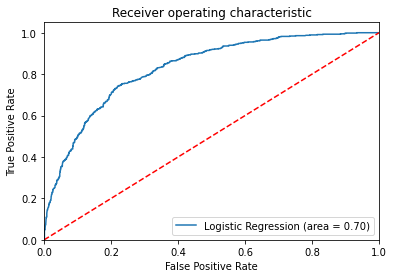

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

    coefficients                     features
3      -2.914329                       tenure
4      -1.208231                 phoneservice
5      -0.484607               onlinesecurity
8      -0.451629                  techsupport
0      -0.209098                       gender
2      -0.174352                      partner
6      -0.128828                 onlinebackup
7      -0.022702             deviceprotection
9       0.351944             paperlessbilling
1       0.379114                seniorcitizen
10      0.651410          internetservice_dsl
11      2.118322  internetservice_fiber optic


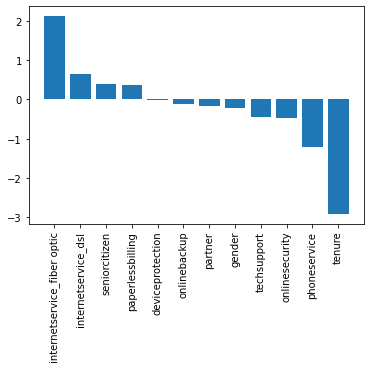

<Figure size 3600x3600 with 0 Axes>

In [66]:
from matplotlib import pyplot
# get importance
importance = logreg.coef_[0]
importance=np.sort(importance)
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

coefficients=pd.DataFrame(logreg.coef_.ravel())
column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
print(coef_sumry.sort_values(by=['coefficients']))


# plot feature importance
pyplot.bar(coef_sumry['features'], coef_sumry['coefficients'])
plt.xticks(rotation = 90)
plt.xticks()
plt.figure(figsize=(50,50)) 
pyplot.show()

## Check Overfitting

In [67]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
kf = KFold(n_splits=10)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

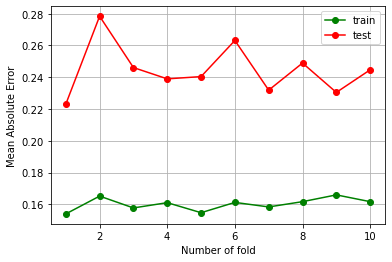

In [68]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [69]:
print("Test Accuracy (Early)", acc)

Test Accuracy (Early) 0.79


In [70]:
with open('logreg.pkl', 'wb') as handle:
    pickle.dump(logreg, handle, pickle.HIGHEST_PROTOCOL)

In [ ]:
# import pickle
# pickle_out = open("model.pkl", "wb")
# pickle.dump(gbc, pickle_out)
# pickle_out.close()


In [31]:
# pip install jinja2==3.0.1

In [30]:
# import jinja2

In [29]:
# !pip install pycaret

In [4]:
from pycaret.datasets import get_data
import pandas as pd
df = pd.read_csv('telco_clean.csv')

In [28]:
from pycaret.classification import *
# exp= setup(df, target = 'Churn', profile=True,fold_shuffle=True, session_id=2, imputation_type='iterative')

In [5]:
# df.shape

(7032, 30)

In [26]:
# df=df[['gender', 'SeniorCitizen', 'Partner','tenure',
#        'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#        'TechSupport', 'PaperlessBilling',
#        'Churn', 'InternetService_DSL',
#        'InternetService_Fiber optic']]

In [27]:
# Read in data
# df = pd.read_csv('telco_clean.csv')

In [25]:
# top3 = compare_models(n_select = 3)

In [22]:
# print(top3)

In [23]:
# lr = create_model('lr', fold = 5)

In [24]:
# tuned_lr = tune_model(lr, optimize = 'AUC')

In [21]:
# plot_model(tuned_lr, plot = 'parameter')

In [20]:
# plot_model(tuned_lr, plot = 'auc')

In [19]:
# plot_model(tuned_lr, plot = 'pr')

# plot_model(tuned_lr, plot = 'confusion_matrix')

In [18]:
# save_model(tuned_lr, 'abc')
# \
# save_model(tuned_lr,imputation_type='iterative' ,'deployment_28042020')

In [12]:
# pip install --user -U scikit-learn==0.23.2

In [13]:
# import sklearn
# print(sklearn.__version__)

In [14]:
# !pip install imblearn no deps pycaret scikit - plot pyod lightgbm plotly

In [15]:
# !pip install pycaret

In [16]:
# pip install --upgrade sklearn==0.23.2

In [17]:
# pip uninstall sklearn --yes